# Text Mining and Text Retrieval Assignment
#### Juan Gesino, Justas Satkus, Leon Surwald,  Max Beauroyre


### Assignment: 
This assignment will be using a Kaggle dataset that can be accessed here. It consists of a collection of approximatley 140,000 articles from 15 different sources published between the years 2000 and 2017. 

### Objective of the assignment 
The goal of this assignment is to analyze the political bias of the different news outlets, and be able to correctly classify the content of a news article to its corresponding news outlet. 

### Table of Contents 

#### Section 1.0 
- 1.1 Selecting a publication of our choice
- 1.2 Identifying the politcal bias 
- 1.3 Write an initial hypothesis regarding the content of the topics and the angle of said topics as covered by the chosen publicaiton. 
- 1.4 Present statistics on the chosen publication.


#### Section 2.0 
- 2.1 Creation of Dictionary
- 2.2 Use of Stopwords and Stemming
- 2.3 Additional cleaning

#### Section 3.0 
- 3.1 Corpus BoW with n-grams
- 3.2 TF-IDF and Term-Document matrix
- 3.3 2 values of K, the number of topics
- 3.4 Storing of document embeddings

#### Section 4.0 
- 4.1 Comparing topics from SVD and LDA
- 4.2 Using Jaccard Index to compare the sets of Top-N words
- 4.3 Studying and illustrating similarities

#### Section 5.0 
- 5.1 Selecting values for K
- 5.2 Topic of LDA
- 5.3 Observation of saturation in a topic
- 5.4 Top 10 articles with highest saturation
- 5.5 Conclusion with regards to Question 1


#### Section 6.0 

- 6.1 Selection of second publication
- 6.2 LDA on joint corpus
- 6.3 LDA embeddings to predict original publication
- 6.4 Comparing using Lexical method


* The following assignment is broken down into the subsequent sections:

1. Describing the Corpus 
2. Pre-process the Corpus 
3. Produce a few topic models of your corpus 
    * This was done with BoW and TF-IDF, using two different values of K. 
    
4. Comparing the Topics 
    * This will be done usign LDA and SVD 
    * Jaccard Index will be used to compare the set of N-words from the topics 
    
5. Observing the Saturation 

6. Predict a publication using an ML model

**The pickle file is here just scroll down, this will save on computing time**

## 1. Describe the corpus

##### Importing the necessary packages

In [64]:
# Importing some necessary packages 

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/leonsurwald/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

####  1. a) Selecting a publication

We have made the decision of focusing on Breitbart so will only be importing 'articles1' for this part of the assignment to reduce file size and optimize computing time.

In [10]:
# creating the dataframe and importing the file 
df = pd.read_csv('articles1.csv')

#### 1. b) Establishing the political bias and initial hypothesis 

In [11]:
df = df[df["publication"] == "Breitbart"]

Breitbart News Network is politically conservative American news. Their media bias is extreme right. This information was obtained from [AllSlides](https://www.allsides.com/news-source/breitbart).

**1. c)**
**Initial Hypothesis:**
Breitbart covers news on topics such as gun control, politics, economics, immigration, abortion, trade, anti drugs. Such news topics are covered from an angle of pro gun, anti-immigration, anti-abortion, anti-free trade. The angle when reporting news stories falls in line with their bias being of the extreme right. 

####  1. d) Description of the publication

In [4]:
df.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
7803,7803,26539,CNN’s Zeleny: ’Hard to Imagine’ Obama Would Ha...,Breitbart,Ian Hanchett,2017-01-17,2017.0,1.0,NaN,On Tuesday’s broadcast of CNN’s “Situation Roo...
7804,7804,26540,American Students on Spring Break Chant ’Build...,Breitbart,Katherine Rodriguez,2017-03-21,2017.0,3.0,NaN,A group of American spring break revelers repo...
7805,7805,26541,Surge in ’Honour Crimes’ and Forced Marriages ...,Breitbart,Liam Deacon,2017-04-08,2017.0,4.0,NaN,“honour crimes” have risen by 40 per cent in...
7806,7806,26542,MILO Announces New Media Venture - Breitbart,Breitbart,Lucas Nolan,2017-04-28,2017.0,4.0,NaN,Former Breitbart Senior Editor MILO has announ...
7807,7807,26543,Jared Kushner at Center of Media Spotlight on ...,Breitbart,Penny Starr,2017-05-27,2017.0,5.0,NaN,The focus of the continuous media reports of a...


In [5]:
df.describe()

,Unnamed: 0,id,year,month,url
count,23781.000000,23781.000000,23781.000000,23781.000000,0.0
mean,19696.118330,38442.041798,2016.316471,5.458223,NaN
std,6867.731642,6877.424802,0.472909,3.313807,NaN
min,7803.000000,26539.000000,2013.000000,1.000000,NaN
25%,13749.000000,32485.000000,2016.000000,3.000000,NaN
50%,19695.000000,38438.000000,2016.000000,5.000000,NaN
75%,25643.000000,44397.000000,2017.000000,8.000000,NaN
max,31591.000000,50357.000000,2017.000000,12.000000,NaN


In [8]:
# Total number of characters
df["content"].apply(lambda t: len(t)).sum()

70986798

In [9]:
# Average number of characters
df["content"].apply(lambda t: len(t)).mean()

2985.021571843068

In [10]:
#Total number of sentences
df["content"].apply(lambda t: len(t.split("."))).sum()

638422

In [11]:
# Average number of sentences
df["content"].apply(lambda t: len(t.split("."))).mean()

26.84588537067407

In [12]:
#Total Words
df["content"].apply(lambda t: len(t.split(" "))).sum()

12384235

In [13]:
# Average Word Count
df["content"].apply(lambda t: len(t.split(" "))).mean()

520.761742567596

In [15]:
#Creating the initial dictionary 
list_of_sentences = df["content"].tolist()
list_of_list_of_words = list(map(lambda s: s.split(" "), list_of_sentences))
list_of_words = [val for sublist in list_of_list_of_words for val in sublist]
len(set(list_of_words))

303225

#### Summary of the observations 

- There are 23781 articles by Breitbart.

- Character count: 70986798

- Average characters per article: 2985.02

- Sentences count: 638422

- Average sentences per article: 26.85

- Word count: 12384235

- Average words per article: 520.76

- Unique Words (dictionary): 303225

## 2. Pre-Processing of the Corpus

#### 2. a) Creating Dictionary

In [16]:
#creating the corpus it will be called papers
papers = df["content"]

In [68]:
import re

# Remove punctuation
papers = papers.map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers = papers.map(lambda x: x.lower())

# Print out the first rows of papers
papers.head()

To verify whether the preprocessing has been done correctly, we are going to make a visual representation of the most common words with a word count. 

#### 2. b) & 2. c)

#### Tokenizing the corpus

In [65]:
from nltk import word_tokenize

papers= list(map(word_tokenize, papers))

In [19]:
papers[0]

['on',
 'tuesday',
 '’',
 's',
 'broadcast',
 'of',
 'cnn',
 '’',
 's',
 '“',
 'situation',
 'room',
 '”',
 'cnn',
 'senior',
 'washington',
 'correspondent',
 'jeff',
 'zeleny',
 'stated',
 'that',
 'chelsea',
 'manning',
 '’',
 's',
 'transition',
 'from',
 'a',
 'man',
 'to',
 'a',
 'woman',
 '“',
 'certainly',
 'played',
 'into',
 '”',
 'president',
 'obama',
 '’',
 's',
 'decision',
 'to',
 'commute',
 'manning',
 '’',
 's',
 'sentence',
 'and',
 '“',
 'without',
 'that',
 'it',
 '’',
 's',
 'hard',
 'to',
 'imagine',
 'i',
 'think',
 'this',
 'president',
 'would',
 'have',
 'done',
 'that',
 '”',
 'zeleny',
 'said',
 '“',
 'i',
 'think',
 'a',
 'question',
 'that',
 'this',
 'president',
 'the',
 'white',
 'house',
 'will',
 'have',
 'to',
 'answer',
 'here',
 '—',
 'will',
 'answer',
 'and',
 'i',
 'think',
 'it',
 '’',
 's',
 'an',
 'important',
 'one',
 'if',
 '—',
 'how',
 'much',
 'was',
 'the',
 'personal',
 'story',
 'of',
 'chelsea',
 'manning',
 'involved',
 'in',
 'thi

#### Removing the stopwords

In [70]:
#Removing the stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def remove_stopwords(tokens):
    return [w for w in tokens if not w in stopwords.words("english")]

papers = list(map(remove_stopwords, papers))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/leonsurwald/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Lemmatizing the corpus

In [48]:
# Lemmatizing corpuses words
from nltk.stem.wordnet import WordNetLemmatizer

stemmer = WordNetLemmatizer()

def stemize(words):
    stems = [stemmer.lemmatize(word) for word in words]
    return stems

papers = list(map(stemize, corpuses))

#### Exporting Pickle File

In [3]:
# Exporting the pickle file
#with open('corpuses_stems.pkl', 'wb') as f:
    #pickle.dump(corpuses_stems, f)

#### Importing Pickle File which contains pre-processing from above

In [18]:
# Importing the pickle file 
import pickle
with open('corpuses_stems.pkl', 'rb') as handle:
     papers= pickle.load(handle)

EOFError: Ran out of input

In [15]:
# Corroborating the file 
len(papers)

23781

In [16]:
corpus = []
for article in papers:
    text = ''        
    for word in article:
        if text == '':
            text+=word
        else:
            text+=' '+word
    corpus.append(text)

In [17]:
corpus[0]

'tuesday broadcast cnn situation room cnn senior washington correspondent jeff zeleny stated chelsea manning transition man woman certainly played president obama decision commute manning sentence without hard imagine think president would done zeleny said think question president white house answer answer think important one much personal story chelsea manning involved outcry left strong difficult time federal prison question central question without wonder outcome would think might added b ecause transitioned man woman think certainly played without hard imagine think president would done mediaite follow ian hanchett twitter ianhanchett'

#### Creating a WordCloud Representation

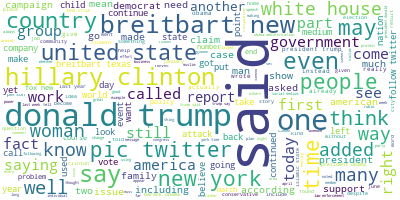

In [19]:
#!pip install wordcloud
from wordcloud import WordCloud

# Join the different processed titles together.
unique_string=(" ").join(corpus)

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(unique_string)

# Visualize the word cloud
wordcloud.to_image()

## Question 3 - Producing a few Topic Models

Next, we are going to transform the textual data by converting the documents into a  vector representation using a BoW with TF-IDF weighting.

In [16]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()


#### 3. a) & b) Creating BoW using TF-IDF weighting

#### TF-IDF

In [17]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Create TfidfVectorizer object
vectorizer = TfidfVectorizer(lowercase = True, 
                             ngram_range=(1,3),
                            max_features=5000)

# Generate matrix of word vectors
tfidf1 = vectorizer.fit_transform(corpus)

# Get words in the vocabulary
tfidf1_vocab = vectorizer.get_feature_names()


# Visualise the 10 most common words
# plot_10_most_common_words(tfidf, vectorizer)

NameError: name 'corpus' is not defined

#### Importing packages and defining printing function

In [22]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

#### 3. c) LDA TF-IDF with K=5

In [23]:
# Tweak the two parameters below
number_topics = 5
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics,
          max_iter=10,
          n_jobs=-1,
          learning_method='online',
          batch_size=128
         )

lda_fit=lda.fit_transform(tfidf1)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, vectorizer, number_words)

# Normalizing 
normalizer = Normalizer()
lda_norm5 = normalizer.fit_transform(lda_fit)

Topics found via LDA:

Topic #0:
said state year people police attack muslim migrant one woman

Topic #1:
trump clinton said hillary republican donald donald trump president campaign hillary clinton

Topic #2:
jeff poor poor jeff baker brexit ben nfl kew ben kew trent

Topic #3:
advertisement comey fbi classified investigation amazon pollak ap joel joel pollak

Topic #4:
gun texas police breitbart texas breitbart officer cartel awrhawkins border illegal


#### LDA TF-IDF with K=10

In [14]:
# Tweak the two parameters below
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics,
          max_iter=10,
          n_jobs=-1,
          learning_method='online',
          batch_size=128
         )

lda_fit=lda.fit_transform(tfidf1)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, vectorizer, number_words)

# Normalizing 
normalizer = Normalizer()
lda_norm = normalizer.fit_transform(lda_fit)

NameError: name 'LDA' is not defined

#### SVD TF-IDF with K=5

In [25]:
# Tweak the two parameters below
number_topics = 5
number_words = 10

# Create and fit the LDA model
svd = TruncatedSVD(n_components=number_topics)
svd_fit=svd.fit_transform(tfidf1)

# Print the topics found by the LDA model
print("Topics found via SVD:")
print_topics(svd, vectorizer, number_words)

# Normalizing 
normalizer = Normalizer()
svd_norm5 = normalizer.fit_transform(svd_fit)

Topics found via SVD:

Topic #0:
trump clinton said president people state donald would news hillary

Topic #1:
police migrant texas gun officer breitbart attack breitbart texas student islamic

Topic #2:
clinton hillary hillary clinton email foundation gun clinton foundation sander fbi bill clinton

Topic #3:
gun awrhawkins breitbart awr awr hawkins hawkins second amendment breitbart news trump amendment

Topic #4:
percent texas cruz breitbart texas poll rubio border cartel voter immigration


#### SVD TF-IDF with K=10

In [26]:
# Tweak the two parameters below
number_topics = 10
number_words = 10

# Create and fit the LDA model
svd = TruncatedSVD(n_components=number_topics)
svd_fit=svd.fit_transform(tfidf1)

# Print the topics found by the LDA model
print("Topics found via SVD:")
print_topics(svd, vectorizer, number_words)

# Normalizing 
normalizer = Normalizer()
svd_norm = normalizer.fit_transform(svd_fit)

Topics found via SVD:

Topic #0:
trump clinton said president people state donald would news hillary

Topic #1:
police migrant texas gun officer breitbart attack breitbart texas student islamic

Topic #2:
clinton hillary hillary clinton email foundation gun clinton foundation sander fbi bill clinton

Topic #3:
gun awrhawkins breitbart awr awr hawkins hawkins second amendment breitbart news amendment trump

Topic #4:
percent texas cruz breitbart texas poll border rubio cartel voter immigration

Topic #5:
police milo twitter black student woman officer pic pic twitter facebook

Topic #6:
texas breitbart breitbart texas cartel news border president trump agent breitbart news

Topic #7:
breitbart news breitbart news breitbart news daily news daily percent siriusxm daily milo conservative

Topic #8:
trump attack police islamic israel migrant cruz muslim islamic state terrorist

Topic #9:
trump obama president percent milo student white white house donald trump donald


#### 3. d) Document Embeddings 

We have 4 document embeddings.

-  lda_norm5 (k=5)
-  lda_norm (k=10)
-  svd_norm5 (k=5)
-  svd_norm (k=10)

We will proceed with using k=10 when comparing LDA & SVD.

## Question 4 - Comparing the Topics

#### 4. a) Using k=10 topics rising from SVD and  topics rising from LDA are copared. Comparison shows that topics rising from the models are quite similar: campaign about Trump, gun control, and border immigration - common topics between the two.

#### 4. b) Using Jaccard Index to compared topics found by SVD and LDA

In [12]:
###################
# An adjusted version of the print_top_words function that returns a list of the top words per topic
def topwords(model, feature_names, n_top_words):
    all_topics = []
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        all_topics.append(message)
        
    return all_topics
        

In [13]:
#!pip install jaccard-index 
from jaccard_index.jaccard import jaccard_index

# Getting feature names and getting the topwords for both LDA and SVD
topwords_lda = topwords(lda,tfidf1_vocab, n_top_words=50)
topwords_svd = topwords(svd,tfidf1_vocab, n_top_words=50)

print("\nComparison of LDA and SVD Top words using Jaccard Index")

for i in range(len(topwords_lda)):
    print('topic',i,'has a Jaccard index of:',jaccard_index(topwords_lda[i],topwords_svd[i]))

ascii_histogram(data)


NameError: name 'lda' is not defined

#### 4. c) The Jaccard Index between the LDA and SVD appears to be hovering around 0.5. The only exception is topic 0 which has a particularly high score with 0.77. This makes sense as for both LDA and SVD, topic 0 seems to be concerned with 'Trump' and 'Clinton' - so most likely something about their rivalry. Overall, LDA and SVD suggest to produce similar results but they are far from identical.

## Question 5 - Study your Corpus

- We will be selecting the LDA which takes into account 10 topics.

#### 5. a) - value for K = 10, topic 0 was selected , b), c)

In [31]:
import pandas as pd
df_corpus=pd.DataFrame(corpus) 

In [32]:
df_corpus.head()

,0
0,tuesday broadcast cnn situation room cnn senio...
1,group american spring break reveler reportedly...
2,honour crime risen per cent five year london n...
3,former breitbart senior editor milo announced ...
4,focus continuous medium report alleged collusi...


In [33]:
df_corpus.columns=['Content']

In [34]:
# Saturation DataFrame
col_names = []
for i in range(len(lda_norm[0])):
    col_names.append("topic "+str(i))
    
# Making the Dataframe
saturation = pd.DataFrame(lda_norm,columns=col_names)

# Joining the saturation with the articles
saturation = saturation.join(df_corpus)

# Sorting the articles by saturation of topic 0
saturation = saturation.sort_values(by='topic 0',ascending=False)

In [35]:
saturation[:10]

,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9,Content
18616,0.999918,0.004234,0.004602,0.004233,0.004232,0.004232,0.004234,0.004233,0.004233,0.004232,president barack obama delivers final state un...
13941,0.999916,0.004999,0.004227,0.004227,0.004228,0.004227,0.004228,0.004226,0.004227,0.004301,know old ideological label conservative libera...
4596,0.999907,0.004270,0.006297,0.004271,0.004270,0.004270,0.004273,0.004269,0.004271,0.004270,welcome breitbart news livewire president dona...
14154,0.999907,0.004373,0.004373,0.004373,0.004372,0.005806,0.004374,0.004395,0.004372,0.004375,welcome dangerous faggot tour milo yiannopoulo...
11871,0.999906,0.004577,0.004577,0.004578,0.004577,0.004577,0.004578,0.004577,0.004577,0.004577,notice donald trump speaking florida night mar...
5298,0.999899,0.005227,0.004912,0.004645,0.004639,0.004639,0.004652,0.004638,0.004639,0.004639,wednesday donald trump addressed reporter pres...
15083,0.999896,0.004524,0.004523,0.004524,0.004523,0.004524,0.006597,0.004523,0.004523,0.004523,welcome breitbart news presidential debate liv...
9245,0.999891,0.004847,0.004848,0.004848,0.005446,0.004851,0.004849,0.004847,0.004848,0.004852,chinese communist defeated driven city mao zed...
21456,0.999888,0.004893,0.004893,0.004894,0.005652,0.005018,0.004895,0.004893,0.004893,0.004893,donald trump president another two month yet a...
21492,0.999883,0.004753,0.004753,0.004754,0.007266,0.004754,0.004754,0.004753,0.004753,0.004754,earlier article democrat v deplorables new cla...


## 5. d) Ilustration of Top 10 Articles

In [36]:
# Printing the first 100 characters of the top 10 news articles for topic 0
# Printing the first 100 characters of the top 10 news articles for topic 0

for i in range(10):
    print(str(i+1),saturation.iloc[i].Content[:100]+'\n')

1 president barack obama delivers final state union speech tonight iran holding american sailor accord

2 know old ideological label conservative liberal worn okay new label new ideology let get right belie

3 welcome breitbart news livewire president donald trump first address joint session congress presiden

4 welcome dangerous faggot tour milo yiannopoulos supervillain internet donald trump president first s

5 notice donald trump speaking florida night march fresh victory two four state went poll saturday cit

6 wednesday donald trump addressed reporter press conference trump tower new york city transcript foll

7 welcome breitbart news presidential debate livewire republican democratic nominee donald trump hilla

8 chinese communist defeated driven city mao zedong led surviving force long march safety rural hinter

9 donald trump president another two month yet already scoring success american worker deal keep thous

10 earlier article democrat v deplorables new class struggle com

### 5. e) It is in line with the observations in question 1 because the words that appear are in alignment with what Breitbart reports. This is observed through the word choice such 'dangerous faggot' 'supervillain internet' 'donald trump president another two month yet already scoring success american'. This allows us to confirm a right-wing bias as outline in our initial hypothesis.

## Question 6 - Predict a Publication

#### 6. a) CNN + Breitbart

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [73]:
DATA_PATH = "all-the-news/articles1.csv"
dataset = pd.read_csv(DATA_PATH)
df = dataset[(dataset["publication"] == "Breitbart") | (dataset["publication"] == "CNN")]

#### 6. b) LDA

In [74]:
def print_topics(topics, feature_names, sorting, topics_per_chunk=6,
                 n_words=20):
    for i in range(0, len(topics), topics_per_chunk):
        # for each chunk:
        these_topics = topics[i: i + topics_per_chunk]
        # maybe we have less than topics_per_chunk left
        len_this_chunk = len(these_topics)
        # print topic headers
        print(("topic {:<8}" * len_this_chunk).format(*these_topics))
        print(("-------- {0:<5}" * len_this_chunk).format(""))
        # print top n_words frequent words
        for i in range(n_words):
            try:
                print(("{:<14}" * len_this_chunk).format(
                    *feature_names[sorting[these_topics, i]]))
            except:
                pass
        print("\n")

In [75]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.wordnet import WordNetLemmatizer
import re

import warnings
warnings.filterwarnings("ignore")

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def lower_letters(content):
    #Use regular expressions to do a find-and-replace
    letters_only = re.sub("[^a-zA-Z]", # The pattern to search for
                          " ",         # The pattern to replace it with
                          content )    # The text to search
    lower_case = letters_only.lower()  # Convert to lower case
    return(lower_case)


def tokenize(content):
    tokens = word_tokenize(lower_letters(content))
    words = [w for w in tokens if not w in stopwords.words("english")]
    stems = [stemmer.lemmatize(word) for word in words]
    
    return(stems)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/leonsurwald/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/leonsurwald/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/leonsurwald/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Sampling the data to reduce the training time.

In [76]:
frac = 0.3
n = int((len(df) * frac)/2)

subsample_b = df[df["publication"] == "Breitbart"].sample(n=n, random_state=42)
subsample_c = df[df["publication"] == "CNN"].sample(n=n, random_state=42)
subsample = pd.concat([subsample_b, subsample_c])

In [77]:
subsample["publication"].value_counts()

CNN          5290
Breitbart    5290
Name: publication, dtype: int64

In [78]:
content = list(subsample["content"])
target = list(subsample["publication"])

In [79]:
content[0:20]

['Police say they have found a newborn baby alive in a trash bin in a restroom at a Pennsylvania gas station. [Westmoreland County District Attorney John Peck told the Associated Press that the baby was found at a BP gas station in North Belle Vernon on Saturday afternoon.  Police believe a woman gave birth in the woman’s restroom. Paramedics called to the scene to treat the mother found the baby, police say. The baby girl appeared to be uninjured and is expected to survive, KDKA reports. She is being monitored at a local hospital. Peck said the District Attorney’s Office is investigating, but no charges have been filed yet.',
 'Footage has emerged of teenagers in a North London suburb being shot at by a man dressed in traditional Muslim attire. [The shooting took place in Edmonton in North London when an armed man opened fire on four teenage boys as he chased them down near a shopping centre.  The footage of the clash reveals that the incident may have been sparked by an argument the 

#### 6. b) Creating BoW and Training LDA
- TF-IDF and LDA respectively are only trained using train sets and then used to transform both train and test partitions. This is done to avoid any potential information leakage into the test sets.

In [80]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(content,target, test_size=0.20, random_state=42)

In [81]:
stemmer = WordNetLemmatizer()

vectorizer = TfidfVectorizer(ngram_range=(1,3), 
                             tokenizer=tokenize,
                             preprocessor = None, 
                             stop_words = 'english',
                             max_df=0.85, 
                             min_df=10,
                             use_idf=True, 
                             smooth_idf = False,
                             sublinear_tf = False)


bow_train = vectorizer.fit_transform(X_train)
bow_test = vectorizer.transform(X_test)

In [82]:
# Number of topics
n_components = 10

from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=n_components, 
                                max_iter=20,
                                learning_method='batch')

lda_train = lda.fit_transform(bow_train)
lda_test = lda.transform(bow_test)

In [85]:
# for each topic (a row in the components_), sort the features (ascending).
# Invert rows with [:, ::-1] to make sorting descending
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]

# get the feature names from the vectorizer:
feature_names = np.array(vectorizer.get_feature_names())

print_topics(
    topics=range(n_components), 
    feature_names=feature_names, 
    sorting=sorting, 
    topics_per_chunk=1, 
    n_words=10)

topic 0       
--------      
erdogan       
duterte       
tciccotta     
recep         
tayyip        
recep tayyip  
pkk           
president recep
volcano       
president recep tayyip


topic 1       
--------      
cartel        
breitbart texas
look amazing  
cnn student news
student news  
zeta          
cnn student   
guzman        
tamaulipas    
mexican       


topic 2       
--------      
said          
people        
police        
year          
cnn           
u             
woman         
new           
state         
time          


topic 3       
--------      
brzezinski    
schwarzenegger
scarborough   
gaga          
viola         
lady gaga     
caracas       
lemonade      
hodgkinson    
faa           


topic 4       
--------      
azuz          
selfies       
videotape     
carl azuz     
begin videotape
end videotape 
clip azuz     
video clip azuz
lily          
video clip    


topic 5       
--------      
advertisement 
chris         
writing       
d

In [86]:
bow_train = pd.DataFrame(bow_train.toarray().transpose(), index=vectorizer.get_feature_names()).transpose()
bow_test = pd.DataFrame(bow_test.toarray().transpose(), index=vectorizer.get_feature_names()).transpose()

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

#### 6. c) Classification/Prediction using LDA

In [88]:
# train a random forest classifier
rf = RandomForestClassifier(
    n_estimators = 1000, 
    random_state = 42, 
    max_depth = 10)

rf.fit(lda_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [89]:
y_pred = rf.predict(lda_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

   Breitbart       0.68      0.67      0.68      1066
         CNN       0.67      0.68      0.68      1050

    accuracy                           0.68      2116
   macro avg       0.68      0.68      0.68      2116
weighted avg       0.68      0.68      0.68      2116



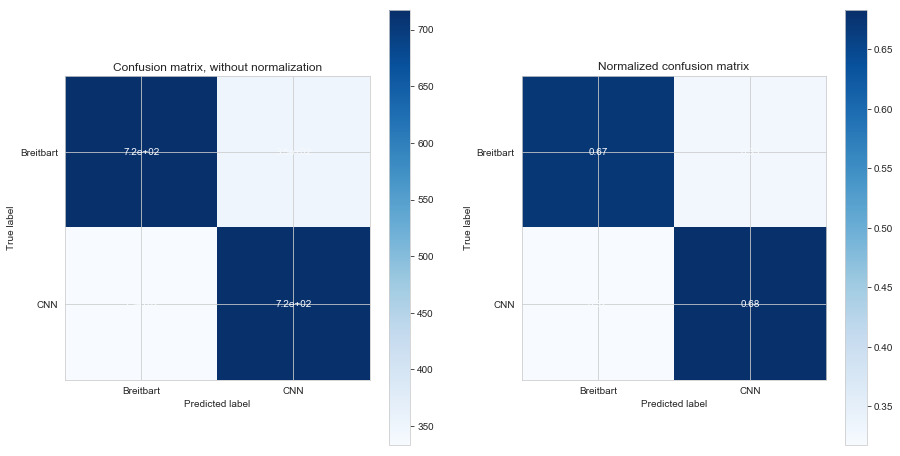

In [90]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

plot_confusion_matrix(rf, lda_test, y_test,
                                  cmap=plt.cm.Blues, normalize=None, ax=ax1)
ax1.set_title("Confusion matrix, without normalization")

plot_conf = plot_confusion_matrix(rf,lda_test, y_test,
                                  cmap=plt.cm.Blues, normalize="true", ax=ax2)
ax2.set_title("Normalized confusion matrix")
    
    
plt.show()

#### 6. d) Classification/Prediction using lexical method (TF-IDF)
- Using the BoW (TF-IDF) as a feature expectedly proves to be signifantly better performing compared to using the LDA. The reason is that the LDA removes information as it tries to reduce documents to their common topics. The BoW still contains the individual words and likely also has somewhat frequent mentions of the respective publication (CNN or Breitbart). Overall this explains why the LDA performs worse than using the BoW (TD-IDF). 

In [91]:
# train a random forest classifier
rf = RandomForestClassifier(
    n_estimators = 1000, 
    random_state = 42, 
    max_depth = 10)

rf.fit(bow_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [92]:
y_pred = rf.predict(bow_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

   Breitbart       0.96      0.88      0.92      1066
         CNN       0.89      0.97      0.93      1050

    accuracy                           0.92      2116
   macro avg       0.93      0.92      0.92      2116
weighted avg       0.93      0.92      0.92      2116



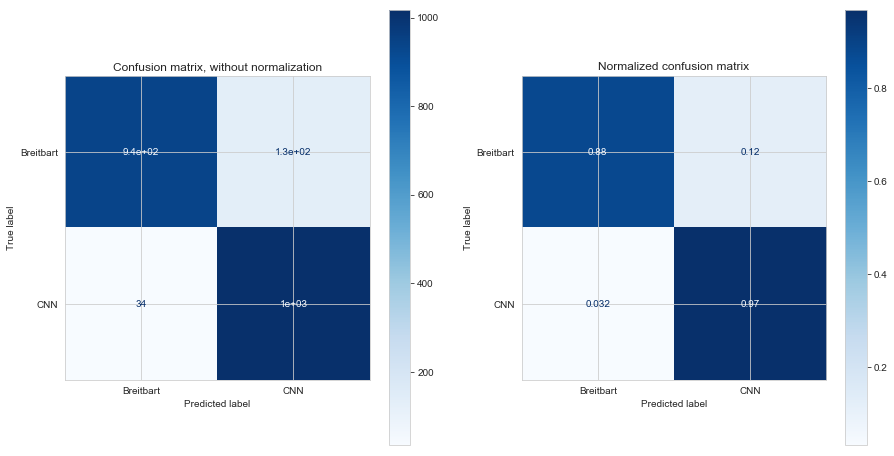

In [93]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

plot_confusion_matrix(rf, bow_test , y_test,
                                  cmap=plt.cm.Blues, normalize=None, ax=ax1)
ax1.set_title("Confusion matrix, without normalization")

plot_conf = plot_confusion_matrix(rf, bow_test, y_test,
                                  cmap=plt.cm.Blues, normalize="true", ax=ax2)
ax2.set_title("Normalized confusion matrix")
    
    
plt.show()